<a href="https://colab.research.google.com/github/popoolarofih/APFFHECOD/blob/main/gofundz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Neccessary Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import requests
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Reading the dataset**

In [24]:
# Load dataset
dataset_path = '/content/drive/MyDrive/charity_navigator_clean.xlsx'
df = pd.read_excel(dataset_path)

# Display the first few rows of the dataframe
df.head()


,Unnamed: 0,accountability_score,administrative_expenses,charity_name,charity_url,city,cn_advisory,compensation_leader_compensation,compensation_leader_expense_percent,compensation_leader_title,...,financial_score,fundraising_expenses,net_assets,organization_type,other_revenue,overall_score,payments_to_affiliates,program_expenses,state,total_contributions
0,0,89,164590,9to5 National Association of Working Women,https://www.charitynavigator.org/index.cfm?bay...,Milwaukee,NaN,53463.0,3.11,Executive Director,...,90.56,111522,1350382,Human and Civil Rights : Advocacy and Education,49634,89.75,0,1440463,WI,1999023
1,1,86,1001560,'Aha PÅ«nana Leo,https://www.charitynavigator.org/index.cfm?bay...,Hilo,NaN,73500.0,1.47,Executive Director,...,85.92,54613,14773920,Education : Early Childhood Programs and Servi...,382540,85.95,0,3912270,HI,3339358
2,2,85,93957,AID FOR AIDS International,https://www.charitynavigator.org/index.cfm?bay...,New York,NaN,85000.0,0.99,Executive Director,...,77.65,248833,-770370,International : Development and Relief Services,0,80.96,0,8157850,NY,8039138
3,3,86,346867,Futures in Education,https://www.charitynavigator.org/index.cfm?bay...,Brooklyn,NaN,61220.0,0.78,Acting Executive Director,...,97.50,384550,11460087,"Education : Scholarship and Financial Support ,",-81726,89.94,0,7018262,NY,9704138
4,4,97,135195,Every Generation Ministries,https://www.charitynavigator.org/index.cfm?bay...,Temecula,NaN,74244.0,5.41,President,...,87.08,87436,723772,Religion : Religious Activities,32436,90.62,0,1148407,CA,1234662


# **Data Preprocessing:**
Handle missing values, categorical variables, and perform feature scaling

In [25]:
# Step 1: Inspect the DataFrame for missing values and column names
print(df.isnull().sum())
print(df.columns)

# Step 2: Remove leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Verify the column names after stripping spaces
print(df.columns)

# Drop columns with more than 50% missing values
threshold = len(df) * 0.5
df.dropna(thresh=threshold, axis=1, inplace=True)

# Separate numeric and non-numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns
non_numeric_cols = df.select_dtypes(exclude=['number']).columns

# Fill missing values for numeric columns with their mean
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Check and handle missing values for specific non-numeric columns if they exist
if 'charity_name' in non_numeric_cols:
    df['charity_name'].fillna(df['charity_name'].mode()[0], inplace=True)
if 'city' in non_numeric_cols:
    df['city'].fillna(df['city'].mode()[0], inplace=True)
if 'compensation_leader_title' in non_numeric_cols:
    df['compensation_leader_title'].fillna(df['compensation_leader_title'].mode()[0], inplace=True)

# Example: Scale numeric features
scaler = StandardScaler()
numeric_features = ['accountability_score', 'administrative_expenses', 'financial_score', 'fundraising_expenses', 'net_assets', 'other_revenue', 'overall_score', 'payments_to_affiliates', 'program_expenses', 'total_contributions']

# Ensure all numeric features exist before scaling
numeric_features = [feature for feature in numeric_features if feature in df.columns]

# Apply StandardScaler to selected numeric features
df[numeric_features] = scaler.fit_transform(df[numeric_features])

Unnamed: 0                                0
accountability_score                      0
administrative_expenses                   0
charity_name                              3
charity_url                               0
city                                      1
cn_advisory                            8184
compensation_leader_compensation        900
compensation_leader_expense_percent     900
compensation_leader_title               363
excess_or_deficit_for_year                0
financial_score                           0
fundraising_expenses                      0
net_assets                                0
organization_type                         0
other_revenue                             0
overall_score                             0
payments_to_affiliates                    0
program_expenses                          0
state                                     0
total_contributions                       0
dtype: int64
Index(['Unnamed: 0', 'accountability_score', 'administrative_ex

**Importing Neccessary Libraries**

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import StandardScaler,  LabelEncoder
from pprint import pprint
from sklearn.metrics import confusion_matrix, roc_curve, auc

# **Exploratory Data Analysis (EDA):**
Visualizations to understand the relationships between different features.

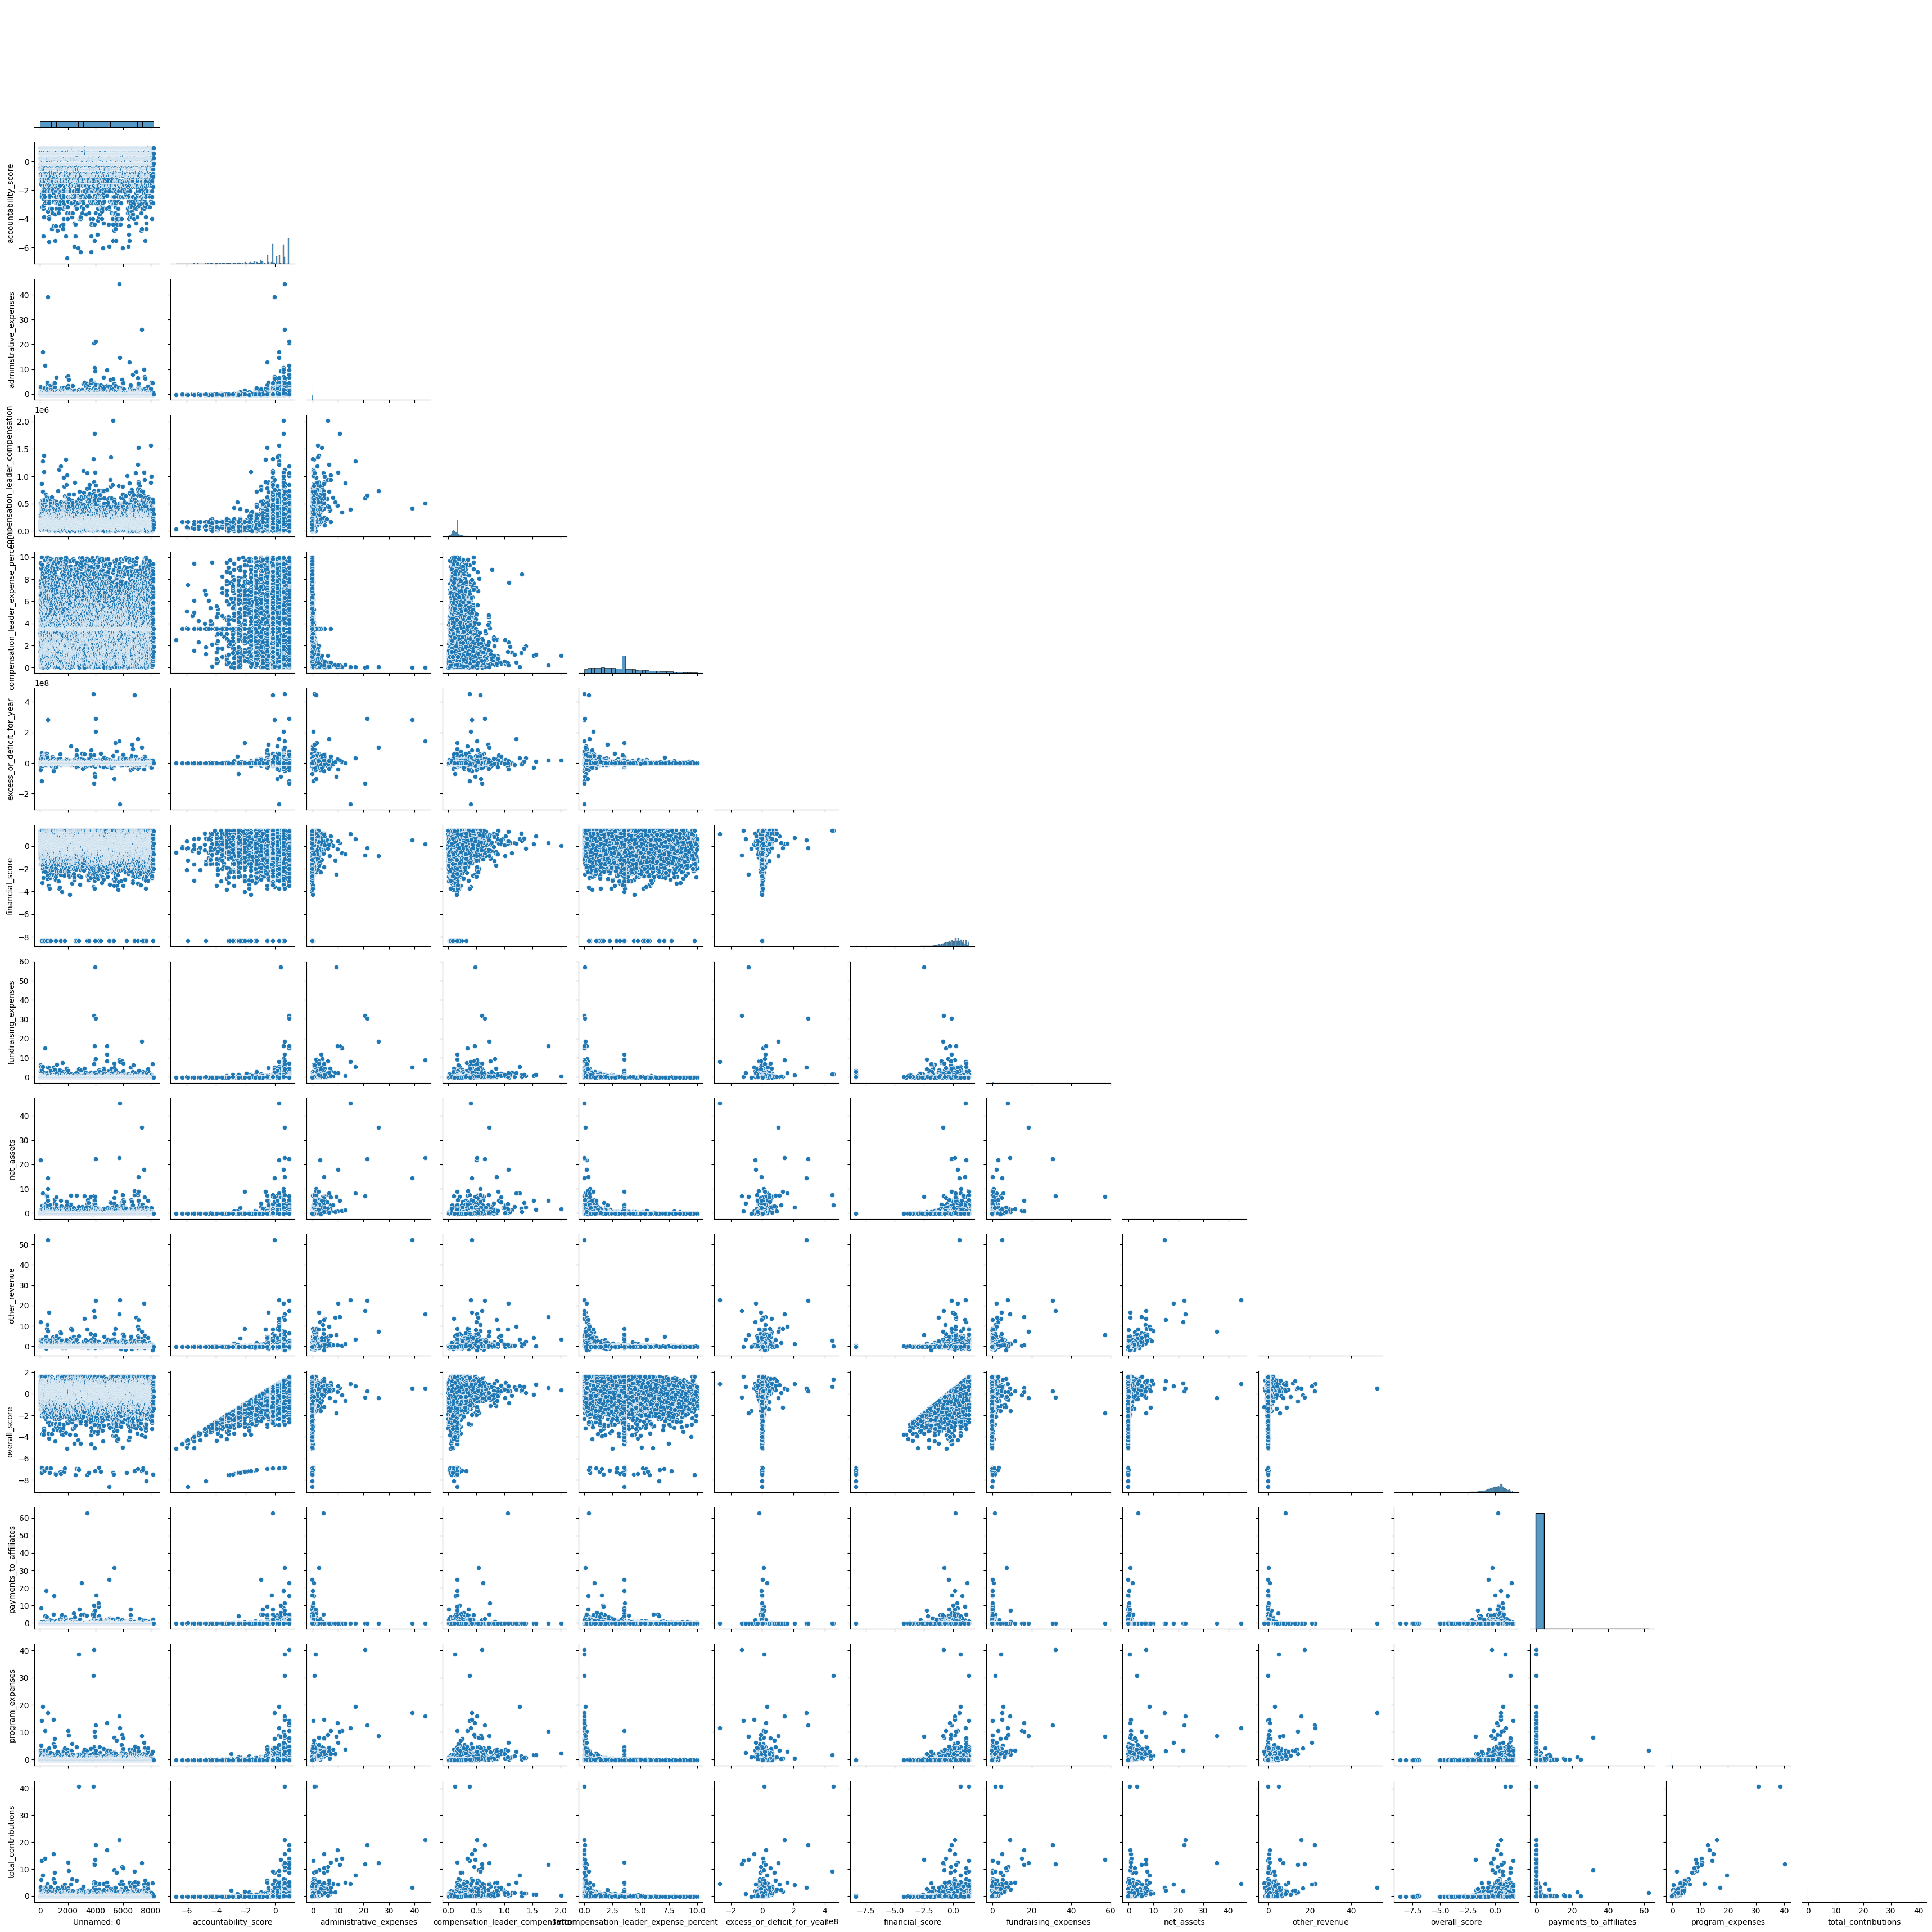

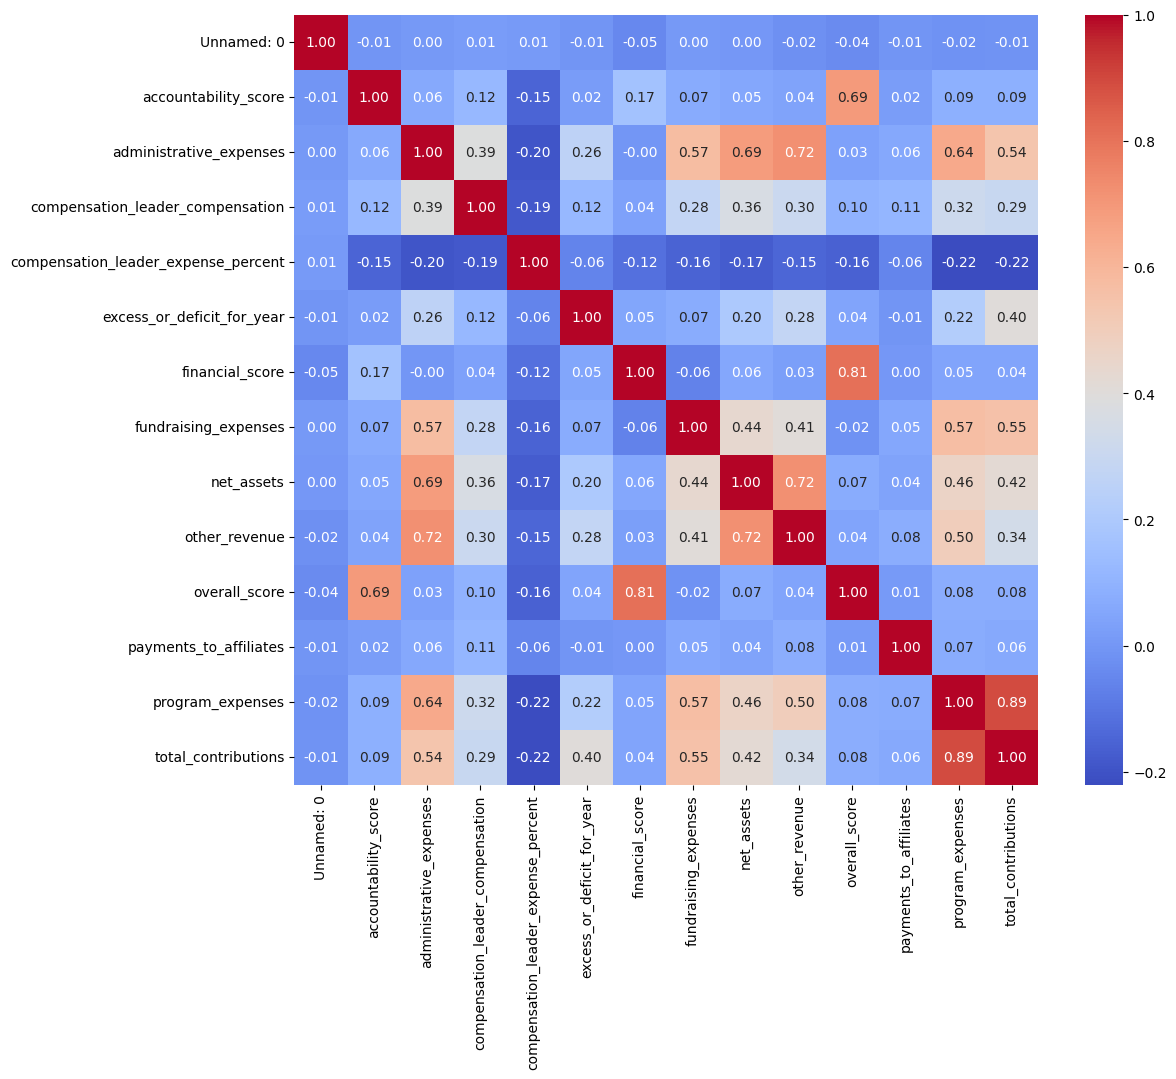

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_data(df):
    """
    This function creates a pair plot and a correlation heatmap to visualize relationships in the data.

    Args:
        df (pandas.DataFrame): The DataFrame containing the data.
    """
    # Check if the DataFrame is empty
    if df.empty:
        print("The DataFrame is empty. Cannot visualize data.")
        return

    # Filter numeric columns
    numeric_df = df.select_dtypes(include=[float, int])

    if numeric_df.empty:
        print("No numeric columns to plot.")
        return

    # Handle missing values by dropping rows with missing values for visualization
    numeric_df = numeric_df.dropna()

    # Create a pair plot with scatter plots for numeric features and histograms on the diagonal.
    sns.pairplot(numeric_df, diag_kind="hist", corner=True)
    plt.show()

    # Create a correlation heatmap with color-coded values and annotations.
    plt.figure(figsize=(12, 10))  # Adjust figure size as desired
    sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")  # Customize colormap and format

    # Display the heatmap
    plt.show()

# Call the function with your DataFrame
visualize_data(df)


**Importing Neccessary Libraries**

In [27]:
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, PowerTransformer
import lightgbm as lgb

# **Split the dataset into training and testing sets.**

In [28]:
# Step 2: Remove leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Drop 'Unnamed: 0' column
df.drop(columns=['Unnamed: 0'], inplace=True)

# Separate numeric and non-numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns

# Fill missing values for numeric columns with their mean
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Drop rows where 'overall_score' is missing
df.dropna(subset=['overall_score'], inplace=True)

# Normalize and standardize numeric features
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
pt = PowerTransformer()
df[numeric_cols] = pt.fit_transform(df[numeric_cols])

# Define target and features
target = 'overall_score'
features = numeric_cols.drop(target)

X = df[features]
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Build a Predictive Model:**

Choose a machine learning algorithm Linear Regression, Random Forest and LightGBM.

Train the model on the training data.

In [29]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42, n_jobs=-1),
    'LightGBM': lgb.LGBMRegressor(random_state=42, n_jobs=-1)
}

# Reduce the number of cross-validation folds to 3 for quicker evaluation
n_folds = 3

# Train and evaluate models using cross-validation
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=n_folds, scoring='neg_mean_squared_error', n_jobs=-1)
    rmse_scores = np.sqrt(-cv_scores)
    print(f"{name} - CV RMSE: {rmse_scores.mean():.4f} ± {rmse_scores.std():.4f}")

#Training the best model and making predictions
best_model = lgb.LGBMRegressor(random_state=42, n_jobs=-1)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Test RMSE: {rmse:.4f}")

Linear Regression - CV RMSE: 0.3435 ± 0.0065
Random Forest - CV RMSE: 0.0202 ± 0.0026
LightGBM - CV RMSE: 0.0583 ± 0.0058
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000893 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2800
[LightGBM] [Info] Number of data points in the train set: 6552, number of used features: 12
[LightGBM] [Info] Start training from score 0.002415
Test RMSE: 0.0180


# **Evaluate the Model**

In [30]:
# Hyperparameter tuning with RandomizedSearchCV for LightGBM
param_dist = {
    'num_leaves': [31, 50, 100],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'max_depth': [-1, 10, 20]
}

random_search = RandomizedSearchCV(estimator=best_model, param_distributions=param_dist, n_iter=10,
                                   scoring='neg_mean_squared_error', cv=n_folds, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Best parameters and model
best_params = random_search.best_params_
best_lgb_model = random_search.best_estimator_

print(f"Best parameters: {best_params}")

# Evaluate the tuned model
y_pred_tuned = best_lgb_model.predict(X_test)
rmse_tuned = mean_squared_error(y_test, y_pred_tuned, squared=False)
print(f"Tuned Test RMSE: {rmse_tuned:.4f}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000852 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2800
[LightGBM] [Info] Number of data points in the train set: 6552, number of used features: 12
[LightGBM] [Info] Start training from score 0.002415
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

# **Visualization**

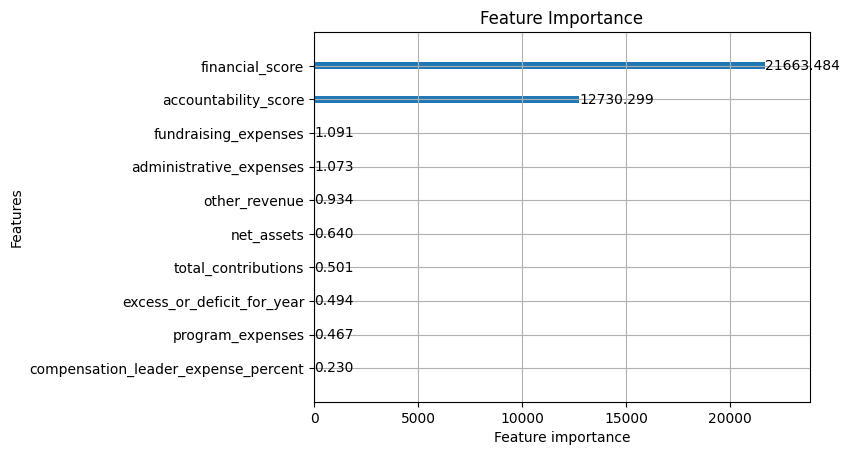

In [31]:
# Plot feature importance
lgb.plot_importance(best_lgb_model, max_num_features=10, importance_type='gain')
plt.title('Feature Importance')
plt.show()


Installing *Shap*

In [32]:
!pip install shap
import shap

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000894 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2800
[LightGBM] [Info] Number of data points in the train set: 6552, number of used features: 12
[LightGBM] [Info] Start training from score 0.002415
Test RMSE: 0.0178


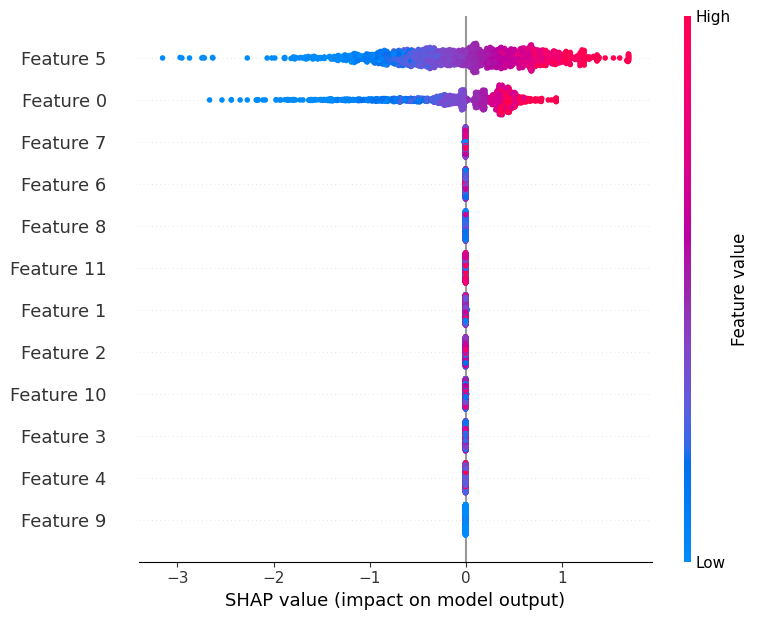

In [33]:
# Define target and features
target = 'overall_score'
features = numeric_cols.drop(target)

X = df[features]
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the scaler and PowerTransformer only on the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
pt = PowerTransformer()
X_train_transformed = pt.fit_transform(X_train_scaled)

# Transform the test data using the same scaler and PowerTransformer fitted on X_train
X_test_scaled = scaler.transform(X_test)
X_test_transformed = pt.transform(X_test_scaled)

# Train the LightGBM model
best_lgb_model = lgb.LGBMRegressor(random_state=42, n_jobs=-1)
best_lgb_model.fit(X_train_transformed, y_train)

# Make predictions on the test set
y_pred = best_lgb_model.predict(X_test_transformed)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Test RMSE: {rmse:.4f}")

# Initialize the SHAP explainer for the LightGBM model
explainer = shap.TreeExplainer(best_lgb_model)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test_transformed)

# Plot the SHAP summary plot
shap.summary_plot(shap_values, X_test_transformed)



# **Quantitative Analysis**

In [34]:
# Perform cross-validation on the entire dataset
cv_scores = cross_val_score(best_lgb_model, X, y, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
cv_rmse = np.sqrt(-cv_scores)
print(f"Cross-validated RMSE: {cv_rmse.mean():.4f} ± {cv_rmse.std():.4f}")

Cross-validated RMSE: 0.0240 ± 0.0048


**Model Reliability:**
Given this performance metric, the model appears to be highly reliable. The small RMSE indicates precise predictions, and the small standard deviation indicates that these predictions are stable across different subsets of data.

**Conclusion:**
The combination of the low RMSE and the small standard deviation provides strong evidence that the model is both accurate and reliable. It suggests that the preprocessing steps, feature selection, and model choice are all well-suited for this regression task.

# **Saving The Model**

In [35]:
# Save the trained model to a file
model_filename = 'best_lgb_model.pkl'
joblib.dump(best_lgb_model, model_filename)

print(f"Model saved to {model_filename}")

Model saved to best_lgb_model.pkl


# **Making Predictions**

In [36]:
# Print the prediction results
prediction_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(prediction_results)


        Actual  Predicted
2126 -1.092527  -1.108375
4270  0.111561   0.131553
4894 -1.300956  -1.297659
6691  0.325958   0.302897
1320  0.422561   0.413666
...        ...        ...
6764 -1.443244  -1.444469
84   -0.644589  -0.634540
6778 -1.656759  -1.667439
3482 -0.610130  -0.621733
4591 -2.160480  -2.065450

[1638 rows x 2 columns]


**Conclusion:**
The close alignment between the actual and predicted values, along with the low RMSE values, indicate that the model is performing well. It suggests that the preprocessing steps and the model itself are effective for this regression task.

***Further tune the model using GridSearchCV for more thorough hyperparameter tuning. This will allow us to explore a wider range of hyperparameters and potentially improve the model's performance further.***

In [38]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for LightGBM with a more selective set of hyperparameters
param_distributions = {
    'num_leaves': [31, 50],
    'learning_rate': [0.01, 0.05],
    'n_estimators': [100, 200],
    'max_depth': [-1, 10],
    'min_child_samples': [20, 50],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize the LightGBM model
lgb_model = lgb.LGBMRegressor(random_state=42, n_jobs=-1)

# Initialize the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=lgb_model, param_distributions=param_distributions,
                                   scoring='neg_mean_squared_error', cv=3, n_iter=20, n_jobs=-1, verbose=1, random_state=42)

# Fit the RandomizedSearchCV object on the training data
random_search.fit(X_train_transformed, y_train)

# Get the best parameters and best model
best_params = random_search.best_params_
best_lgb_model = random_search.best_estimator_

print(f"Best parameters: {best_params}")

# Evaluate the tuned model on the test set
y_pred_tuned = best_lgb_model.predict(X_test_transformed)
rmse_tuned = mean_squared_error(y_test, y_pred_tuned, squared=False)
print(f"Tuned Test RMSE: {rmse_tuned:.4f}")

# Save the tuned model to a file
tuned_model_filename = 'best_lgb_model_tuned.pkl'
joblib.dump(best_lgb_model, tuned_model_filename)

print(f"Tuned model saved to {tuned_model_filename}")

# Perform cross-validation on the entire dataset with the tuned model
cv_scores_tuned = cross_val_score(best_lgb_model, X, y, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
cv_rmse_tuned = np.sqrt(-cv_scores_tuned)
print(f"Cross-validated RMSE for tuned model: {cv_rmse_tuned.mean():.4f} ± {cv_rmse_tuned.std():.4f}")

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000988 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2800
[LightGBM] [Info] Number of data points in the train set: 6552, number of used features: 12
[LightGBM] [Info] Start training from score 0.002415
Best parameters: {'subsample': 0.8, 'num_leaves': 50, 'n_estimators': 100, 'min_child_samples': 20, 'max_depth': -1, 'learning_rate': 0.05, 'colsample_bytree': 1.0}
Tuned Test RMSE: 0.0185
Tuned model saved to best_lgb_model_tuned.pkl
Cross-validated RMSE for tuned model: 0.0294 ± 0.0091


# **Making New Predictions**

In [39]:
# Make predictions on the test set
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_tuned})

# Print the first few rows of the predictions
print(predictions_df.head())

        Actual  Predicted
2126 -1.092527  -1.103272
4270  0.111561   0.125287
4894 -1.300956  -1.287538
6691  0.325958   0.295763
1320  0.422561   0.403947


Evaluation of the Results:

The Actual and Predicted columns show the true and predicted values of the overall_score.

The close values between Actual and Predicted indicate a good fit of the model.

The Tuned Test RMSE value and cross-validated RMSE provide a quantitative measure of the model's performance.